In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import os

#Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Establish Path
path = r'/Users/claireheger/Documents/Instacart Basket Analysis' 

In [4]:
# Import Data from 4.9
opm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opm.pkl'))

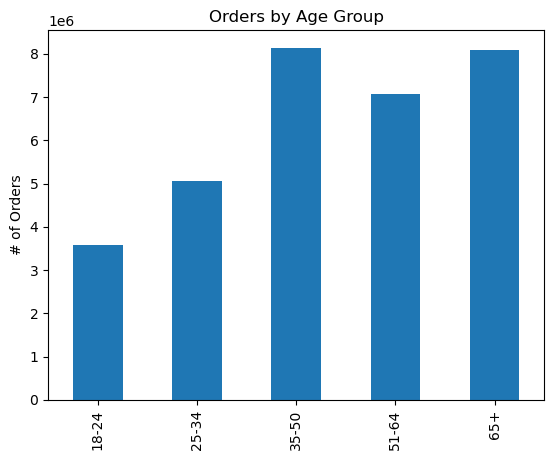

In [5]:
# bar chart for age groups
bar_age = opm['age_group'].value_counts().sort_index().plot.bar()
bar_age.set_title('Orders by Age Group')
plt.ylabel("# of Orders")
plt.show()

In [6]:
# Export visual
bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_age.png'))

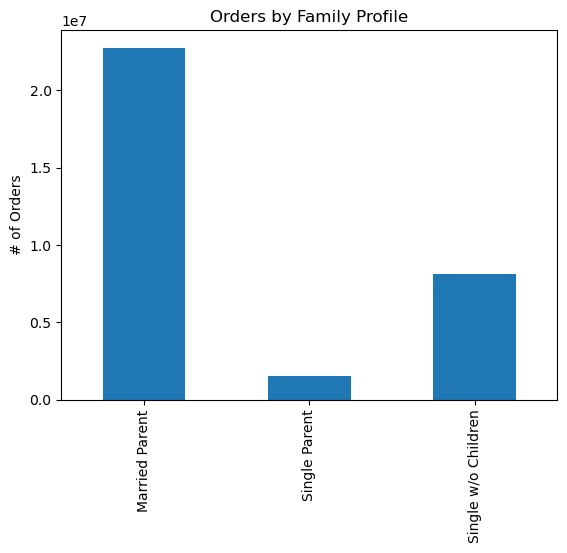

In [7]:
#Family profiles
opm.loc[(opm['fam_status'] != 'married') & (opm['n_dependants'] > 0), 'customer_profile'] = 'Single Parent'
opm.loc[(opm['fam_status'] != 'married') & (opm['n_dependants'] == 0), 'customer_profile'] = 'Single w/o Children'
opm.loc[(opm['fam_status'] == 'married') & (opm['n_dependants'] > 0), 'customer_profile'] = 'Married Parent'
opm.loc[(opm['fam_status'] == 'married') & (opm['n_dependants'] == 0), 'customer_profile'] = 'Married w/o Children'

#Bar chart for family profile
bar_family = opm['customer_profile'].value_counts().sort_index().plot.bar()
bar_family.set_title('Orders by Family Profile')
plt.ylabel("# of Orders")
plt.show()

In [8]:
# Export visual
bar_family.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_family.png'))

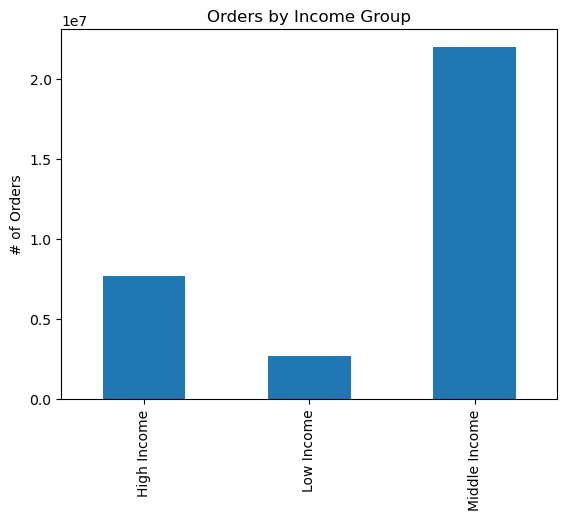

In [9]:
#Bar chart for income 
bar_income = opm['income_group'].value_counts().sort_index().plot.bar()
bar_income.set_title('Orders by Income Group')
plt.ylabel("# of Orders")
plt.show()

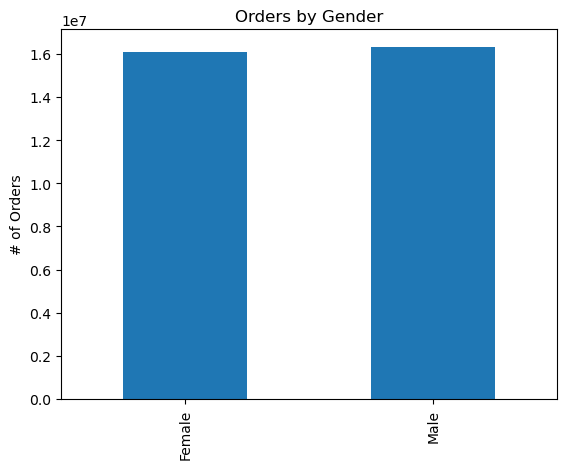

In [10]:
#Bar chart for gender 
bar_gender = opm['gender'].value_counts().sort_index().plot.bar()
bar_gender.set_title('Orders by Gender')
plt.ylabel("# of Orders")
plt.show()

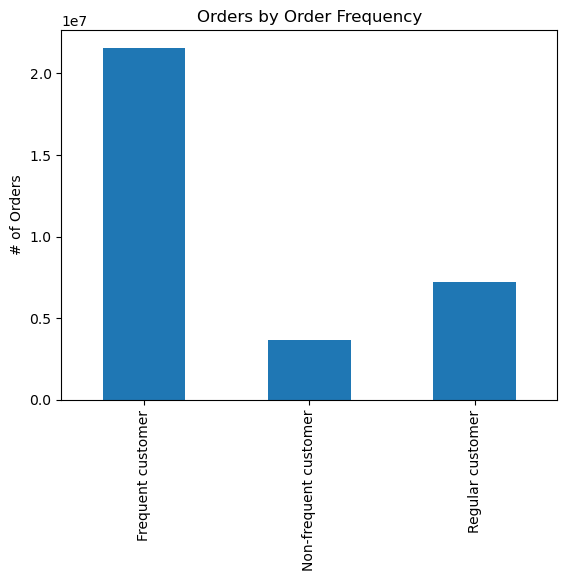

In [11]:
#Bar chart for order frequency 
bar_freq = opm['order_frequency_flag'].value_counts().sort_index().plot.bar()
bar_freq.set_title('Orders by Order Frequency')
plt.ylabel("# of Orders")
plt.show()

In [13]:
# spending habit by age group
crosstab_age_dept = pd.crosstab(opm['department'], opm['age_group'], dropna=False)

In [14]:
crosstab_age_dept

age_group,18-24,25-34,35-50,51-64,65+
department,,,,,
alcohol,18557,24064,38756,33283,36948
babies,47389,63703,111442,91823,103226
bakery,129306,183446,293569,256585,291223
beverages,292004,416097,672118,593072,675269
breakfast,78935,110102,175974,154178,173569
bulk,3872,5430,8810,7219,8609
canned goods,117855,168036,266849,232880,266021
dairy eggs,597035,848269,1360907,1166323,1345789
deli,115149,163872,264147,230463,262141


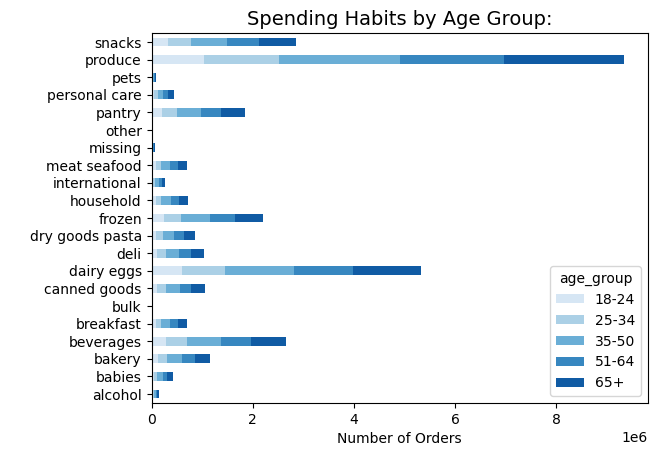

In [15]:
blue_palette = sns.color_palette("Blues", 5)

# Bar chart
crossbar_age_dept = crosstab_age_dept.plot.barh(stacked=True, color=blue_palette)
plt.ylabel(" ")
plt.xticks(rotation=0)
plt.xlabel("Number of Orders")
plt.title("Spending Habits by Age Group:", fontsize=14)
plt.show()

In [18]:
# spending habits by order frequency
crosstab_freq_dept = pd.crosstab(opm['department'], opm['order_frequency_flag'], dropna=False)

In [19]:
crosstab_freq_dept

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,103146,17685,32865
babies,319940,31932,71930
bakery,782925,129647,259856
beverages,1784868,304072,599183
breakfast,463571,80674,158788
bulk,25371,3066,6136
canned goods,671983,137430,258645
dairy eggs,3677609,567109,1154028
deli,685793,122881,242575


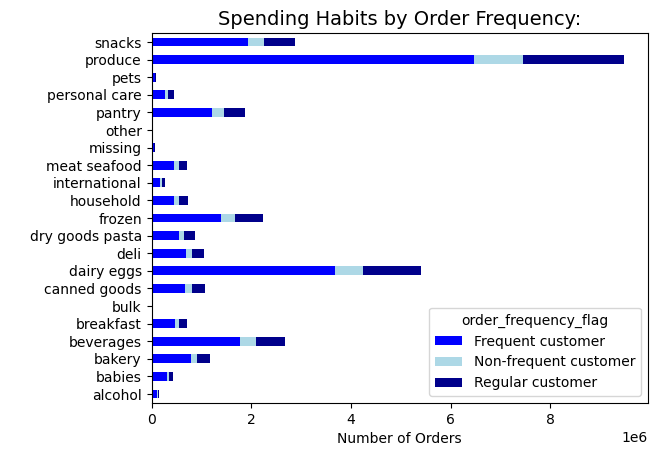

In [20]:
# Bar chart
crossbar_freq_dept = crosstab_freq_dept.plot.barh(stacked=True, color=['blue','lightblue','darkblue'])
plt.ylabel(" ")
plt.xticks(rotation=0)
plt.xlabel("Number of Orders")
plt.title("Spending Habits by Order Frequency:", fontsize=14)
plt.show()

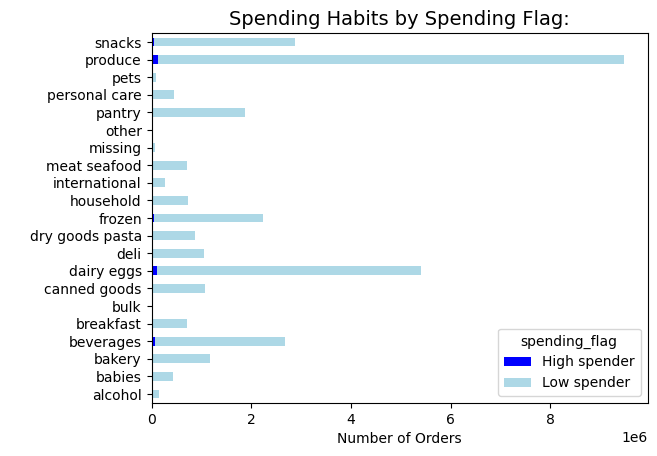

In [21]:
# spending habits by spending flag
crosstab_spend_dept = pd.crosstab(opm['department'], opm['spending_flag'], dropna=False)
# Bar chart
crossbar_spend_dept = crosstab_spend_dept.plot.barh(stacked=True, color=['blue','lightblue'])
plt.ylabel(" ")
plt.xticks(rotation=0)
plt.xlabel("Number of Orders")
plt.title("Spending Habits by Spending Flag:", fontsize=14)
plt.show()

In [31]:
# spending habits by income status
crosstab_income_dept = pd.crosstab(opm['department'], opm['income_status'], dropna=False)

In [35]:
#going to put the above charts in order of products order.

Text(0.5, 0, 'Number of Orders')

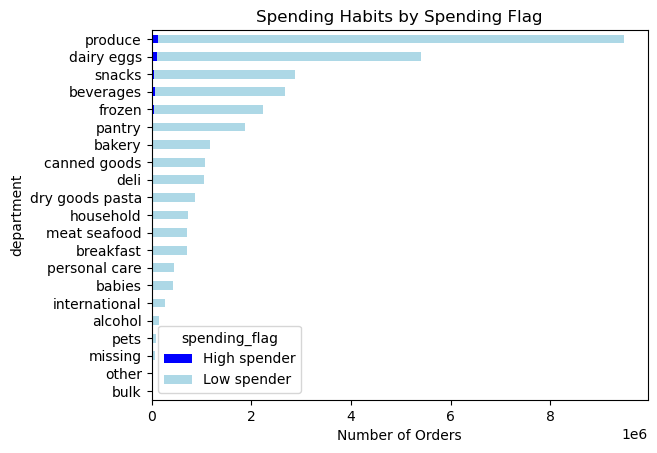

In [38]:
# Spending flag Bar chart
spend_dept = opm.groupby(['department', 'spending_flag']).size().unstack()
spend_dept = spend_dept.loc[income_dept.sum(axis=1).sort_values(ascending=True).index]
bar_spend_dept = spend_dept.plot.barh(stacked = True, title = 'Spending Habits by Spending Flag', color = ['blue','lightblue','darkblue'])
plt.xlabel("Number of Orders")

Text(0.5, 0, 'Number of Orders')

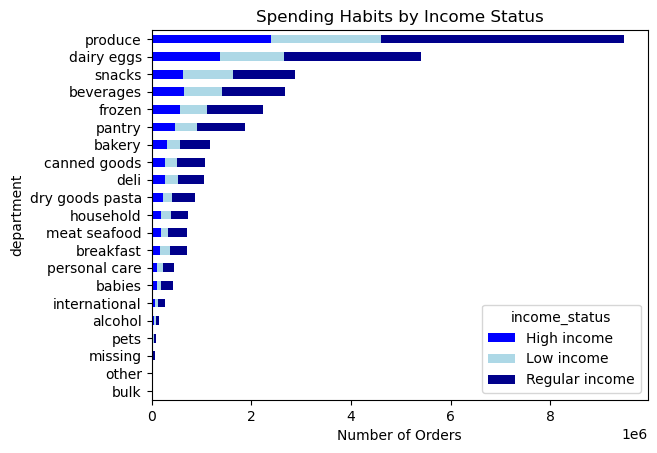

In [36]:
# Income Status Bar chart
income_dept = opm.groupby(['department', 'income_status']).size().unstack()
income_dept = income_dept.loc[income_dept.sum(axis=1).sort_values(ascending=True).index]
bar_income_dept = income_dept.plot.barh(stacked = True, title = 'Spending Habits by Income Status', color = ['blue','lightblue','darkblue'])
plt.xlabel("Number of Orders")

Text(0.5, 0, 'Number of Orders')

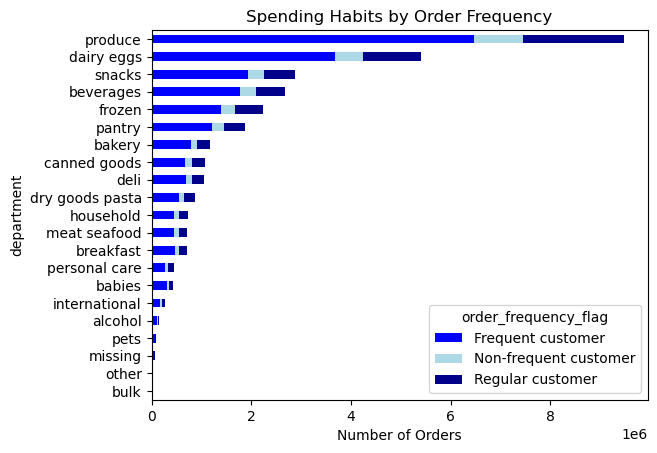

In [39]:
# Order Frequency Bar chart
freq_dept = opm.groupby(['department', 'order_frequency_flag']).size().unstack()
freq_dept = freq_dept.loc[freq_dept.sum(axis=1).sort_values(ascending=True).index]
bar_freq_dept = freq_dept.plot.barh(stacked = True, title = 'Spending Habits by Order Frequency', color = ['blue','lightblue','darkblue'])
plt.xlabel("Number of Orders")

Text(0.5, 0, 'Number of Orders')

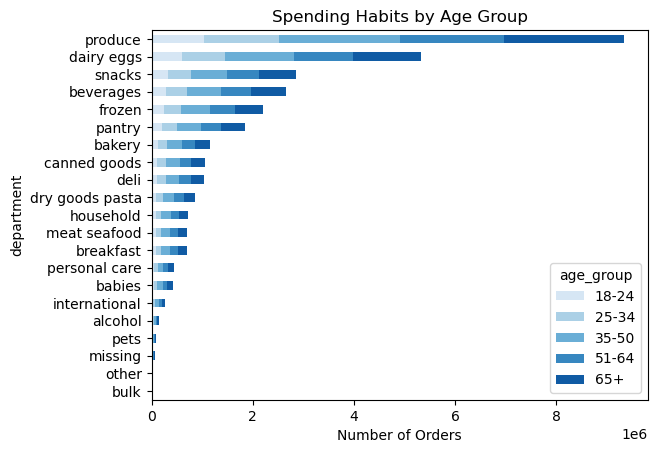

In [41]:
# Age Group Bar chart
age_dept = opm.groupby(['department', 'age_group']).size().unstack()
age_dept = age_dept.loc[age_dept.sum(axis=1).sort_values(ascending=True).index]
bar_age_dept = age_dept.plot.barh(stacked = True, title = 'Spending Habits by Age Group', color = blue_palette)
plt.xlabel("Number of Orders")